![imagen](./img/seaborn.png)

- [**Exploratory Data Analysis with Seaborn**](#Exploratory-Data-Analysis-with-Seaborn)
- [**Tipos de las variables**](#Tipos-de-las-variables)
    - [**1. Analisis univariante**](#1.-Análisis-univariante)
        - [**1.1 Variables cuantitativas**](#1.1-Variables-cuantitativas)
        - [**1.2 Variables cualitativas**](#1.2-Variables-cualitativas)
    - [**2. Analisis Bivariante**](#2.-Análisis-Bivariante)
        - [**2.1 Comparativa de variables cuantitativas**](#2.1-Comparativa-de-variables-cuantitativas-(2-4-variables))
        - [**2.2 Comparativa de múltiples numéricas**](#2.2-Comparativa-de-múltiples-numéricas)
        - [**2.3 Comparativa de dos variables cualitativas**](#2.3-Comparativa-de-dos-variables-cualitativas)
        - [**2.4 Cualitativa vs cuantitativa**](#2.4-Cualitativa-vs-cuantitativa)

[**Seaborn**](https://seaborn.pydata.org/) es una librería de visualización de datos de Python basada en matplotlib. Esta nos permite hacer interfaces de alto nivel con gráficas atractivas pero también estadísticamente informativas. 

# Exploratory Data Analysis with Seaborn
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una varibale numérica
- Una variable categórica
- Dos variables numércias
- Tres o más variables numércias
- Dos variablees categóricas
- Variables numércias y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

https://www.data-to-viz.com/

In [1]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
sns.set(color_codes = True)
pd.set_option("display.max_rows", 500)

# para eliminar los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install sklearn

In [3]:
# Cargamos las features en un DataFrame:

iris_df = pd.DataFrame(load_iris()["data"], columns = load_iris()["feature_names"])
boston_df = pd.DataFrame(load_boston()["data"], columns = load_boston()["feature_names"])

# Y añadimos la columna de especies:
iris_df["target"] = load_iris()["target_names"][load_iris()["target"]]
boston_df["target"] = load_boston()["target"]
# Cargamos tb el dataset del titanic
titanic_df = pd.read_csv("data/titanic.csv", sep = "\t")

# Cargamos los datos del supermarket sales
market_df = pd.read_csv("data/supermarket_sales.csv")

# Cargamos dataset de suicidios
suicid_df = pd.read_csv("data/suicide.csv")

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:

![imagen](./img/dtypes.png)

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimétrica? ¿por qué? ¿Hay outliers?

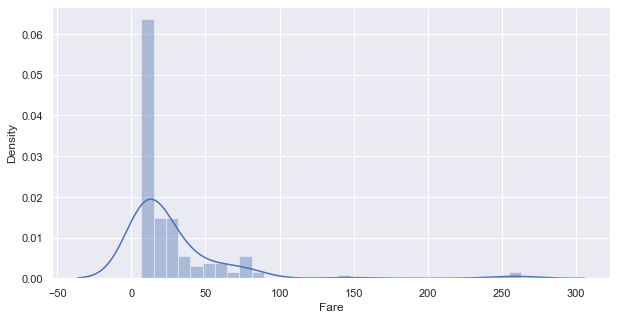

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"], hist = True)


#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

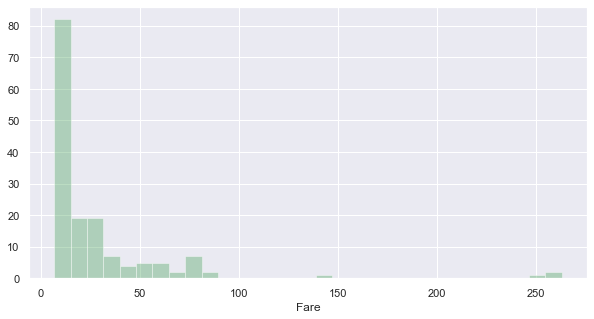

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde = False,
            color = "g")

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

<Figure size 720x360 with 0 Axes>

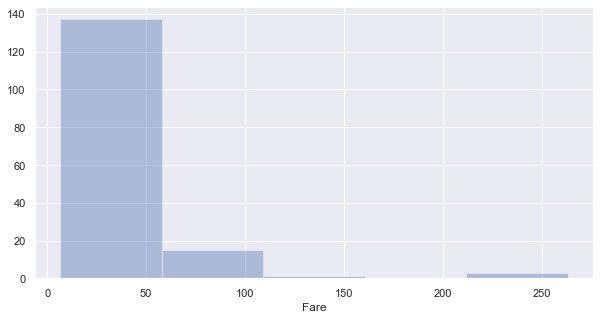

In [9]:
plt.figure(figsize=(10,5))
plt.figure(figsize = (10,5))
sns.distplot(titanic_df["Fare"],
            kde = False,
            bins = 5)

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

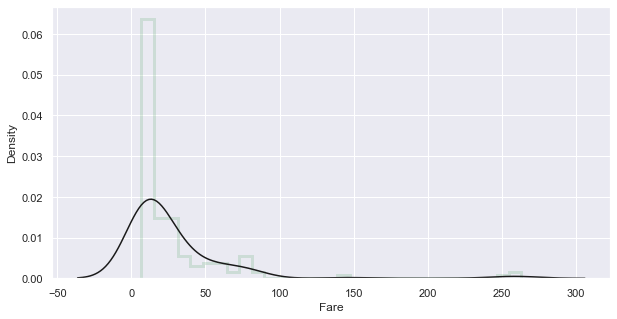

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df["Fare"],
            kde_kws = {"color":"k", "label":"KDE"},
            hist_kws = {"histtype": "step", "linewidth":3,
                       "alpha":0.2, "color":"g"})
#alpha es la opacidad

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

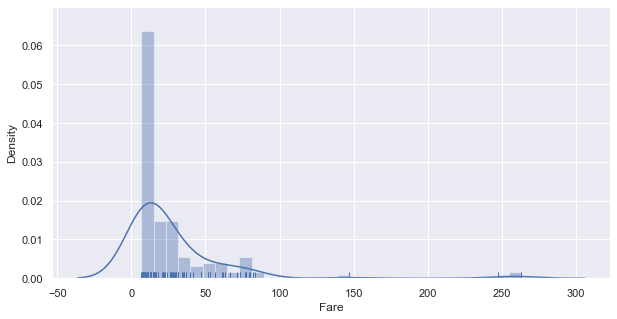

In [11]:
plt.figure(figsize=(10,5))

sns.distplot(titanic_df["Fare"],
            rug = True)

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxlot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

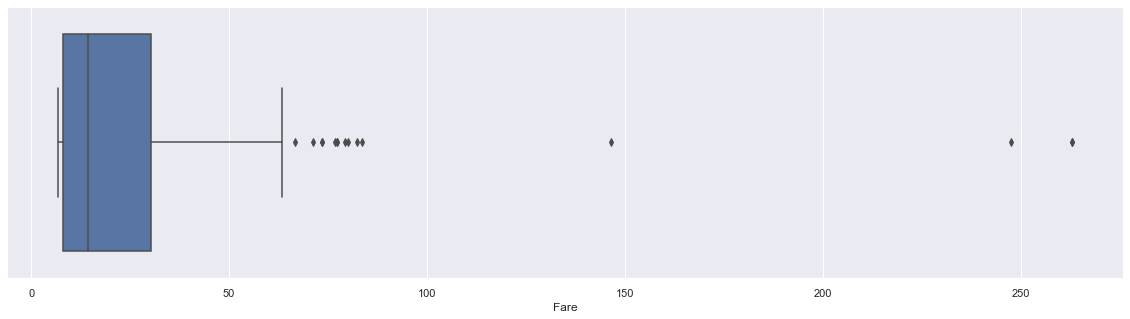

In [12]:
plt.figure(figsize=(20,5))
sns.boxplot(titanic_df["Fare"])

![imagen](./img/boxplot.png)

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

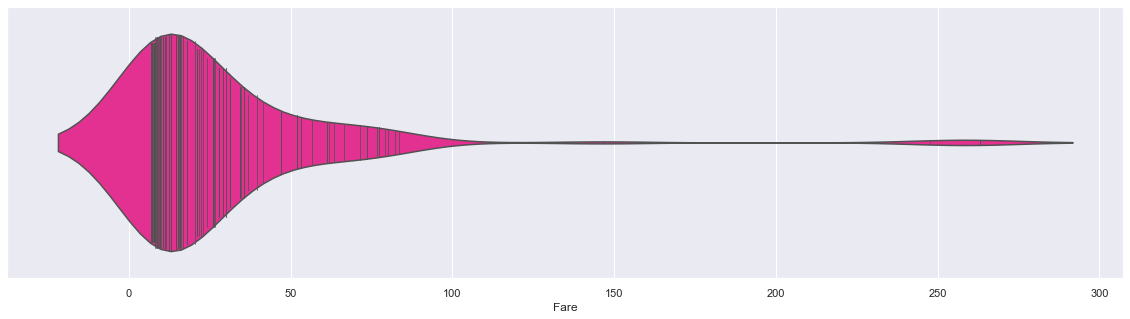

In [13]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df["Fare"], color ="deeppink", inner = "stick")

In [14]:
plt.figure(figsize=(20,5))


<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

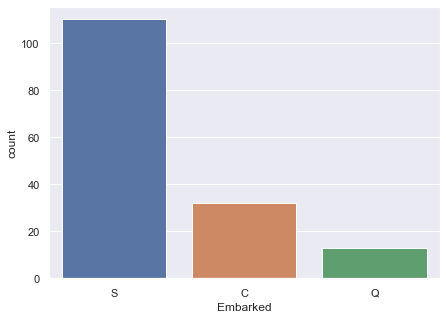

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(titanic_df["Embarked"])

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [16]:
# para representar datos cualitativos necesitaremos la frecuencia de aparición, por eso usamos value_counts
market_df["Product line"].value_counts(ascending = True)

Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product line, dtype: int64

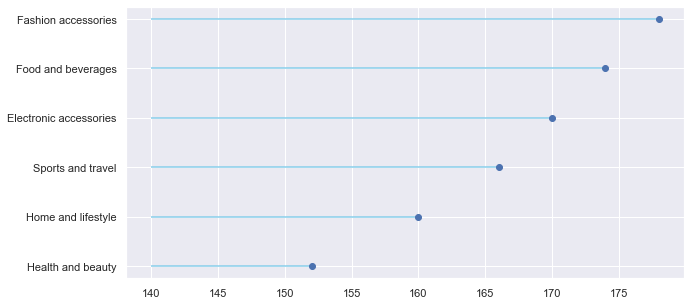

In [17]:
conteo = market_df["Product line"].value_counts(ascending = True)
#aquí pintamos dos gráficos, uno con hlines para las líneas horizontales y otro para los puntos

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index, xmin = 140, xmax = conteo, color = "skyblue")

plt.plot(conteo, conteo.index, "o")

#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

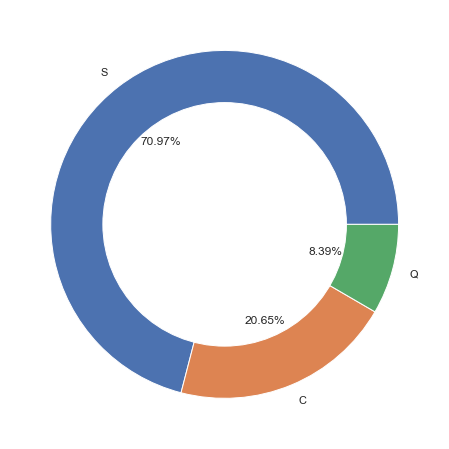

In [18]:
# create data
data = titanic_df["Embarked"].value_counts()
 
# Create a circle for the center of the plot
my_circle = plt.Circle((0,0), 0.7, color ="white")

plt.figure(figsize = (8,8))
plt.pie(data.values,
       labels = data.index,
       autopct = "%1.2f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)


In [19]:
# create data

# pie chart


## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

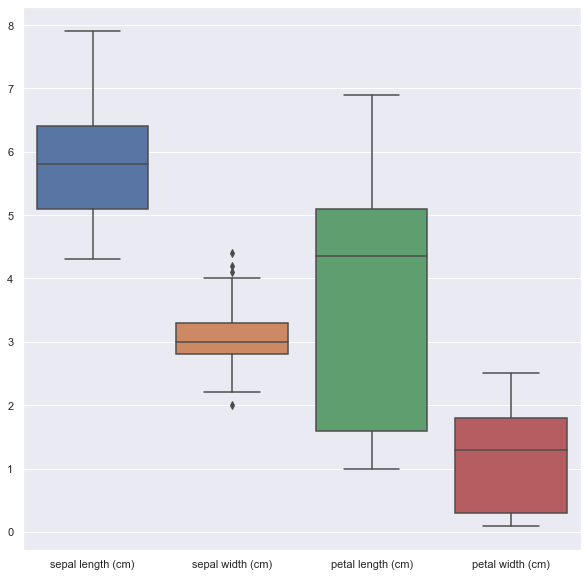

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[:4]])

El boxplot está bien, pero haay algo de información que se nos escapa

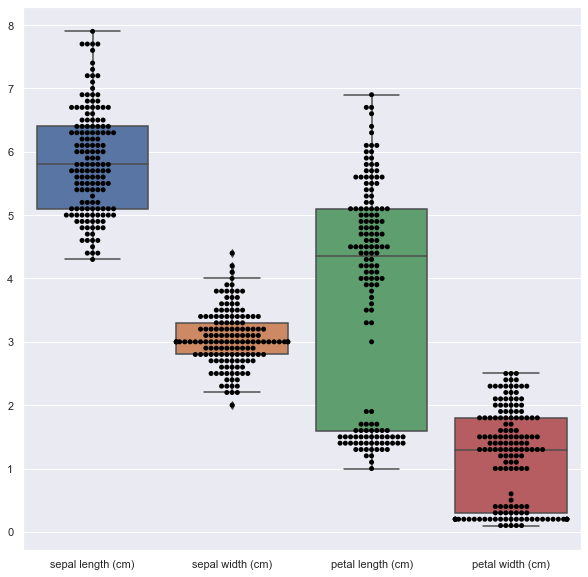

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris_df[iris_df.columns.values[:4]])
sns.swarmplot(data = iris_df[iris_df.columns.values[:4]], color = "black")

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

In [22]:
sns.__version__ 

'0.11.1'

In [23]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.8/site-packages (0.11.1)


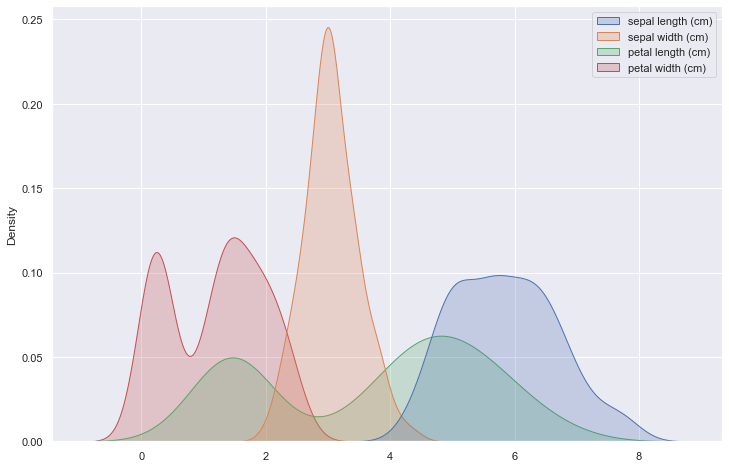

In [24]:
plt.figure(figsize=(12,8))
sns.kdeplot(data = iris_df[iris_df.columns.values[:4]], shade = True)

#### Histogramas

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

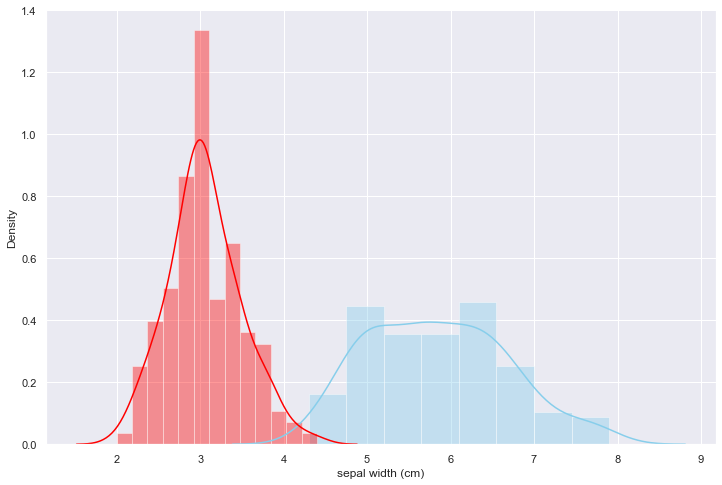

In [28]:
plt.figure(figsize=(12,8))
sns.distplot(iris_df["sepal length (cm)"], color = "skyblue", label = "Sepal Length")
sns.distplot(iris_df["sepal width (cm)"], color = "red", label = "Sepal Width")

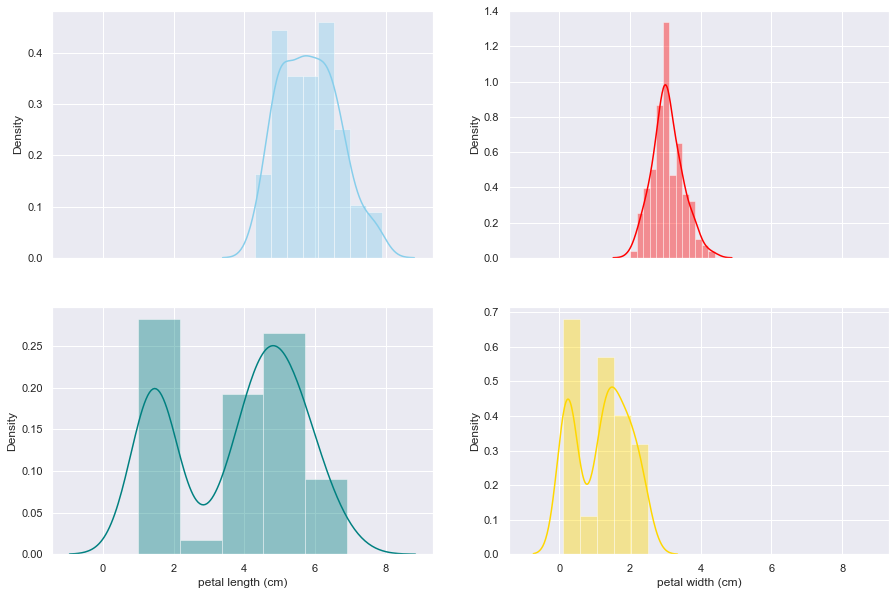

<Figure size 864x576 with 0 Axes>

In [31]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)
plt.figure(figsize=(12,8))
sns.distplot(iris_df["sepal length (cm)"], color = "skyblue", ax = axes[0,0])
sns.distplot(iris_df["sepal width (cm)"], color = "red", ax = axes[0,1])
sns.distplot(iris_df["petal length (cm)"], color = "teal", ax = axes[1,0])
sns.distplot(iris_df["petal width (cm)"], color = "gold", ax = axes[1,1])

#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [32]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

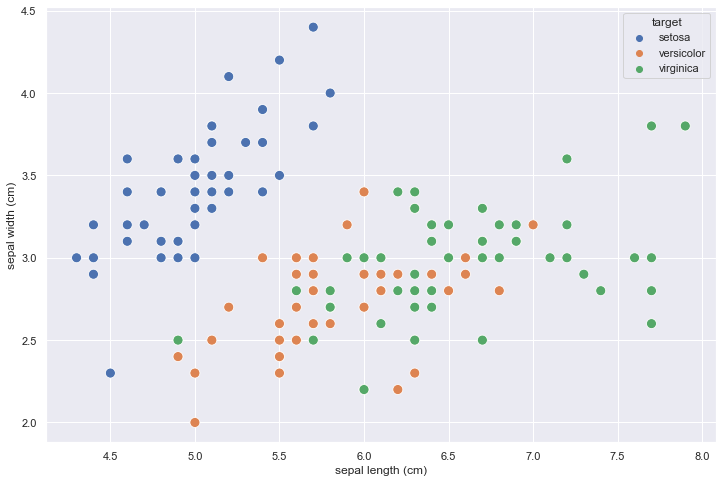

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=iris_df["sepal length (cm)"], y=iris_df["sepal width (cm)"], hue = iris_df["target"], s=100)

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

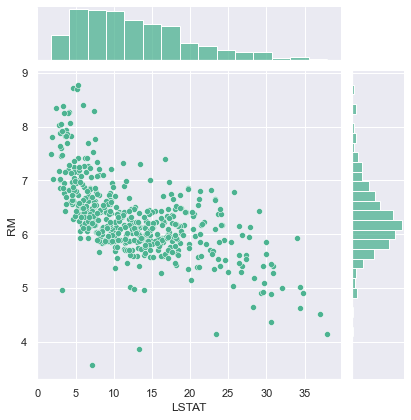

In [44]:
sns.jointplot(x=boston_df["LSTAT"],
             y = boston_df["RM"],
             color = "#4CB391")

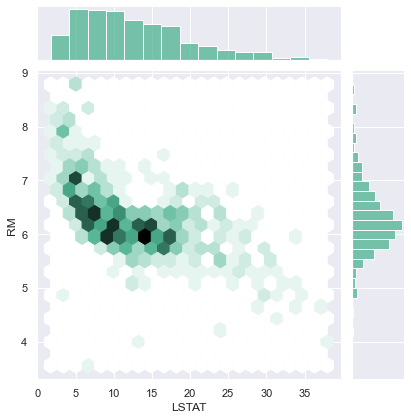

In [52]:
sns.jointplot(x=boston_df["LSTAT"],
             y = boston_df["RM"],
              kind = "hex", 
              color = "#4CB391")

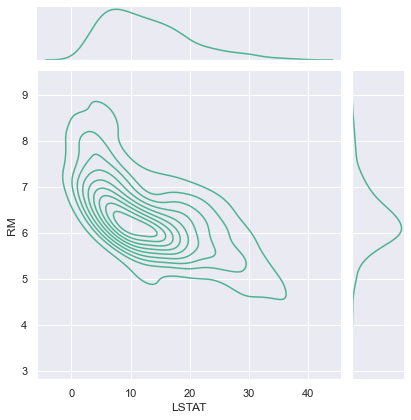

In [53]:
sns.jointplot(x=boston_df["LSTAT"],
             y = boston_df["RM"],
              kind = "kde", 
              color = "#4CB391")

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [54]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


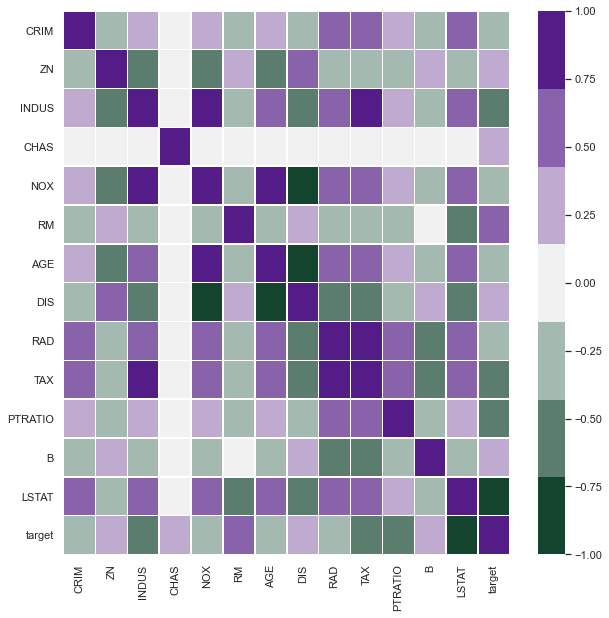

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(),
           vmin = -1,
           vmax = 1,cmap = sns.diverging_palette(148,280, s=85,l=25, n=7)
           ,linewidth= 0.5)

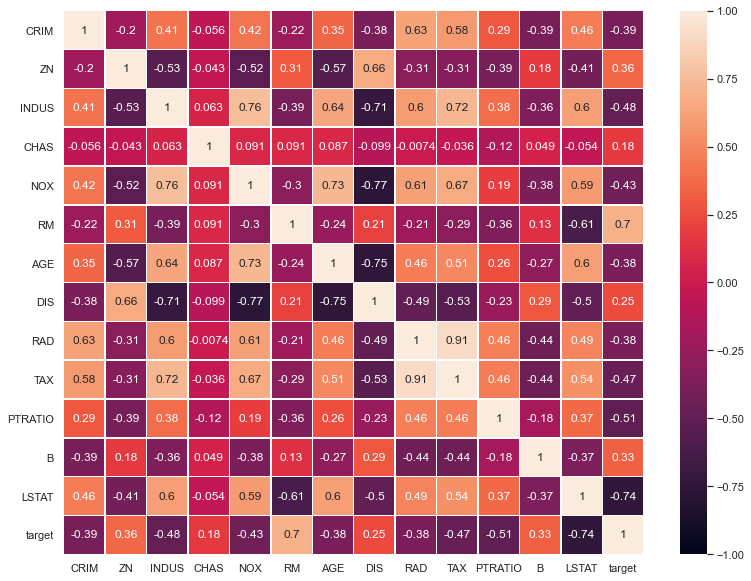

In [69]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(boston_df.corr(), 
            vmin = -1,
            vmax = 1, 
            annot = True,
           linewidth=0.5)

También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

In [81]:
data = suicid_df.groupby(["country", "age"]).sum()["suicides_no"].unstack()
data_filtrado = data.loc[["Italy", "Spain", "Portugal", "Belgium", "Czech Republic"]]
data_filtrado

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Italy,8571.0,16115.0,39250.0,400.0,43314.0,24410.0
Spain,7559.0,13373.0,30331.0,354.0,29807.0,18778.0
Portugal,1505.0,2590.0,6535.0,85.0,8189.0,5157.0
Belgium,4475.0,8731.0,24300.0,216.0,16887.0,8152.0
Czech Republic,3596.0,5498.0,16885.0,174.0,12042.0,5492.0


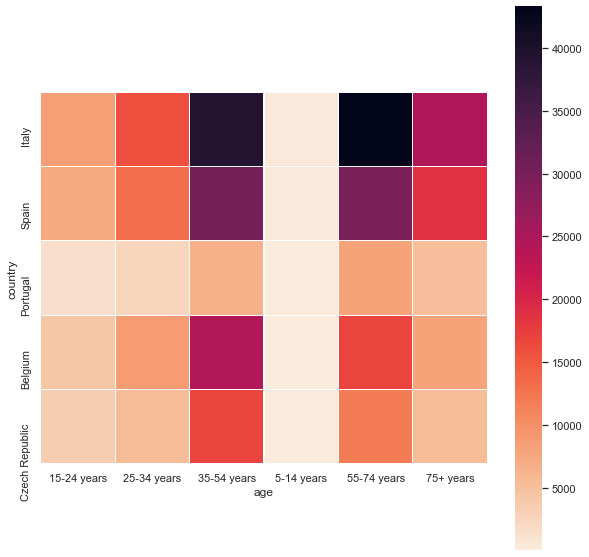

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap(data_filtrado,square=True,linewidth=0.3, cmap = sns.cm.rocket_r)

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas varaibles porque no se va a ver bien. Hazlo por partes.

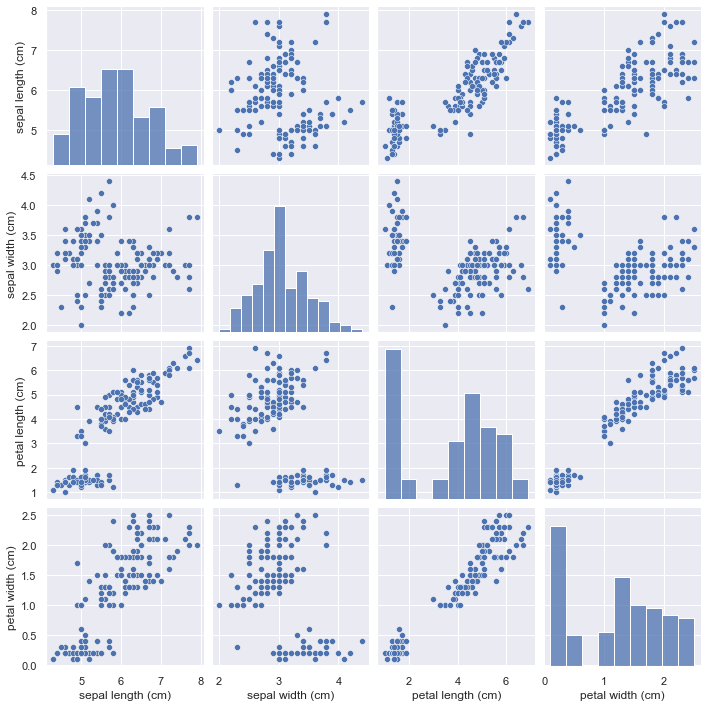

In [85]:
sns.pairplot(iris_df)

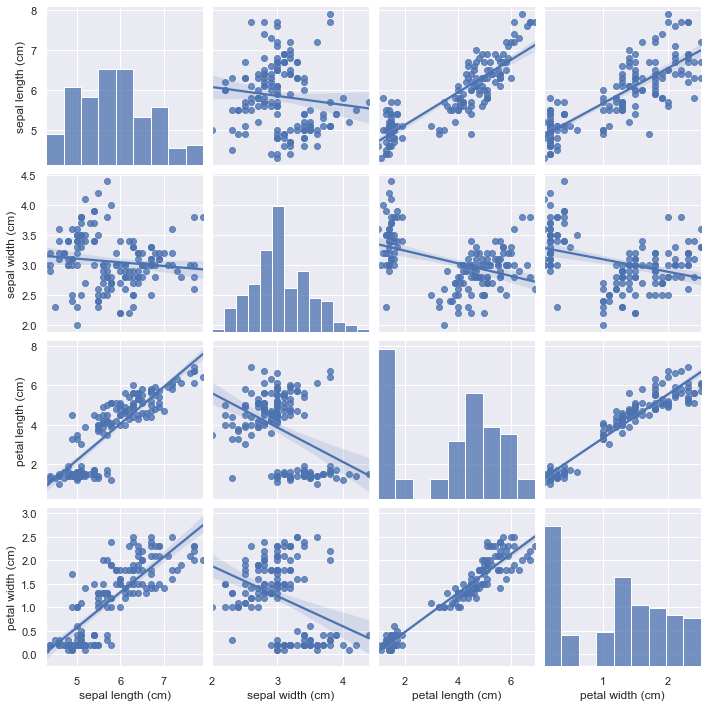

In [87]:
sns.pairplot(iris_df, kind = "reg")

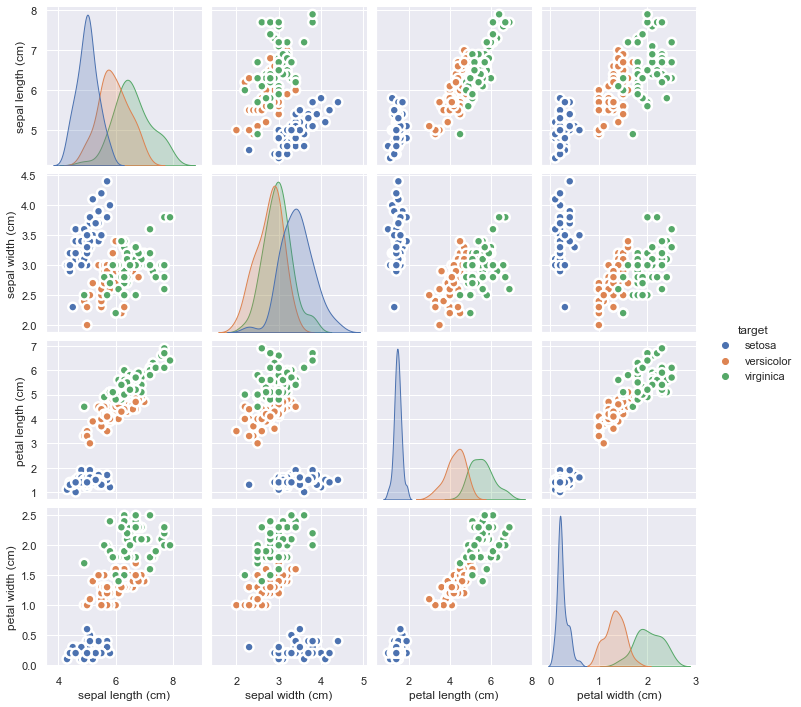

In [88]:
sns.pairplot(iris_df, kind = "scatter", hue = "target", plot_kws = dict(s=80,edgecolor = "white", linewidth = 2.5))

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [89]:
pd.crosstab(titanic_df["Embarked"],
           titanic_df["Sex"])

Sex,female,male
Embarked,,
C,11,21
Q,7,6
S,37,73


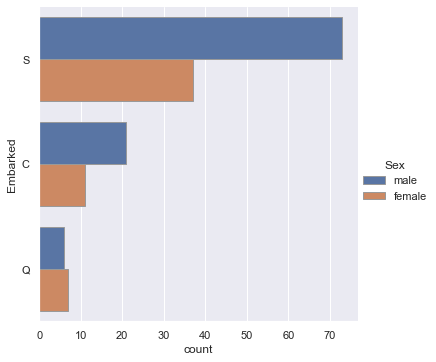

In [90]:
sns.catplot(y="Embarked", hue = "Sex", kind = "count", edgecolor = ".6", orient ="H", data = titanic_df)

#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

Otra manera de visualizar dos o más variables categóricas

In [ ]:
plt.figure(figsize=(30,10));


### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [ ]:
plt.figure(figsize=(15,10))


#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [ ]:
#!pip install squarify

In [ ]:
import squarify
plt.figure(figsize=(15,10))


**Bubblechart**

**A partir de aquí te dejo que seas tú el que le eches un ojo al resto de opciones.**

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

In [ ]:
sns.catplot(x = 'Survived',
           y = 'Age',
           hue = 'Sex',
           data = titanic_df);

El equivalente con un diagrama de caja sería el siguiente

In [ ]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

In [ ]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

In [ ]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split = True, data=titanic_df);

In [ ]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df);

In [ ]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

In [ ]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]

chart = sns.catplot(x = 'age',
                   y = 'suicides/100k pop',
                   hue = 'sex',
                   col = 'country',
                   data = suicid_df2,
                   height = 8,
                   aspect = 0.8)

chart.set_xticklabels(rotation=45);

In [ ]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=titanic_df, x="Fare", hue="Embarked",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

In [ ]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(x = 'year',
           y = 'suicides_no',
           palette = 'Blues_d',
           data = suicid_df2,
           ci = None);

In [ ]:
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)